In [1]:
import pandas as pd
df = pd.read_csv("/content/mydata.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3552 non-null   object 
 1   Open             3552 non-null   float64
 2   High             3552 non-null   float64
 3   Low              3552 non-null   float64
 4   Close            3552 non-null   float64
 5   Volume           3552 non-null   int64  
 6   Dividends        3552 non-null   int64  
 7   Stock Splits     3552 non-null   float64
 8   Gain             3552 non-null   float64
 9   Loss             3552 non-null   float64
 10  Avg_Gain         3552 non-null   float64
 11  Avg_Loss         3552 non-null   float64
 12  RSI              3552 non-null   float64
 13  SMA              3552 non-null   float64
 14  EMA              3552 non-null   float64
 15  MACD             3552 non-null   float64
 16  Bollinger_Upper  3552 non-null   float64
 17  Bollinger_Lowe

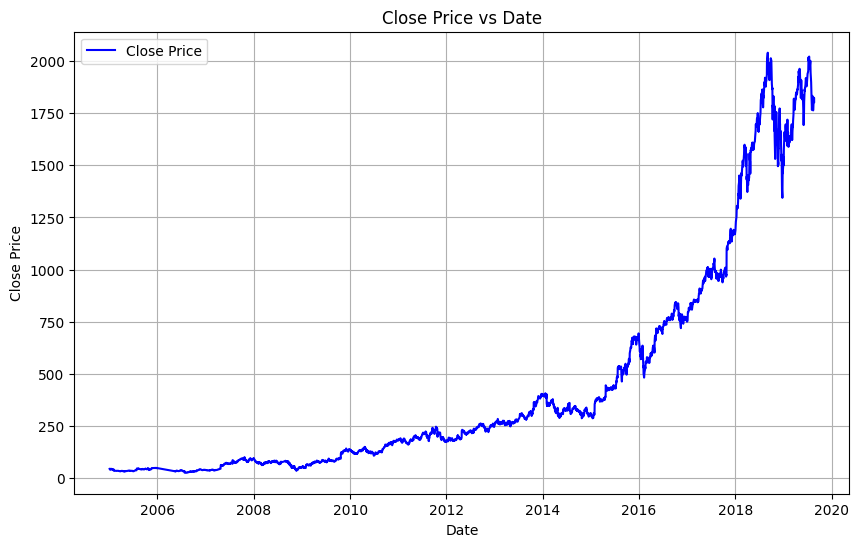

In [3]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs Date')
plt.grid(True)
plt.legend()

plt.show()

In [4]:
!pip install tensorflow

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
# Load dataset
df = pd.read_csv("/content/mydata.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use only Close Price for time series analysis
df = df[['Close']]
df = df.asfreq('D')  # Ensure daily frequency
df = df.ffill()

ADF Statistic: 1.845448727019237
p-value: 0.9984350228031562
KPSS Statistic: 8.905712746310822
p-value: 0.01


<ipython-input-6-a9e6622a4581>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['Close'], regression='c')


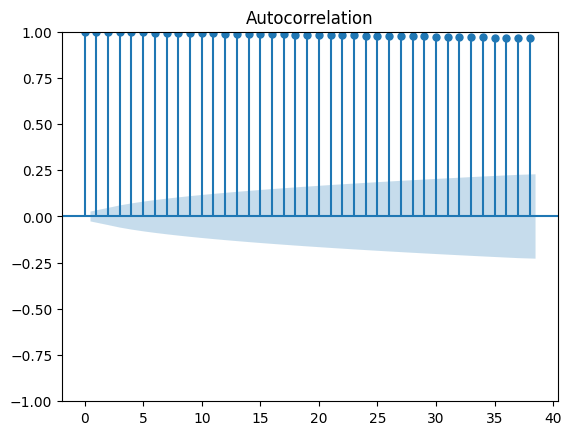

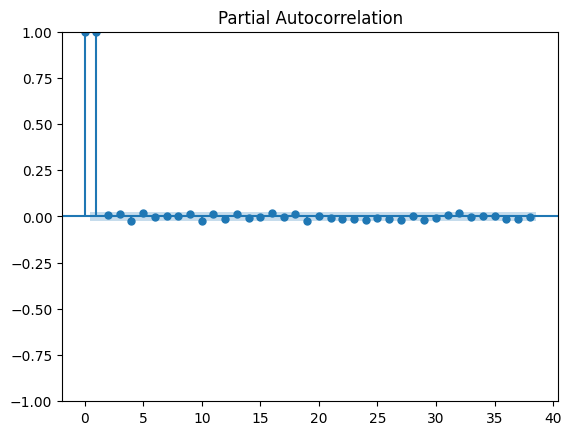

In [6]:
# Re-import required libraries
from statsmodels.tsa.stattools import adfuller, kpss

# Apply first-order differencing again
df_diff = df['Close'].diff().dropna()

# Perform ADF Test again on differenced data
adf_result_diff = adfuller(df_diff)
adf_p_value_diff = adf_result_diff[1]

# Perform KPSS Test again on differenced data
kpss_result_diff = kpss(df_diff, regression='c')
kpss_p_value_diff = kpss_result_diff[1]

# Output the results
(adf_result_diff[0], adf_p_value_diff, kpss_result_diff[0], kpss_p_value_diff)

# ADF Test
adf_result = adfuller(df['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# KPSS Test
kpss_result = kpss(df['Close'], regression='c')
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')

plot_acf(df['Close'])
plot_pacf(df['Close'])
plt.show()


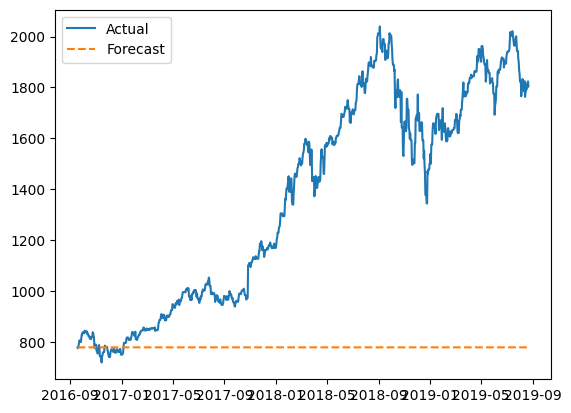

In [7]:
# Split into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA Model
model = ARIMA(train, order=(1,1,1))  # Adjust order based on ACF/PACF
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
plt.legend()
plt.show()


ARIMA Implementation

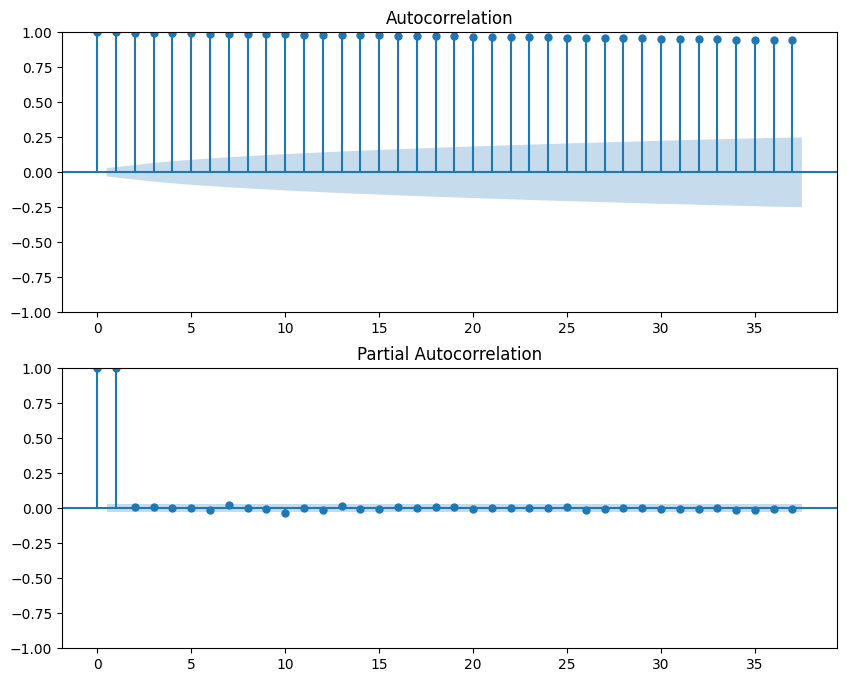

RMSE for ARIMA: 714.4527788893339


In [8]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "/content/mydata.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select only the 'Close' price column
df = df[['Close']]
df = df.asfreq('D')  # Ensure daily frequency
df = df.ffill()

# Split data into train (80%) and test (20%)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ACF & PACF plots for ARIMA model
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train, ax=ax[0])
plot_pacf(train, ax=ax[1])
plt.show()

# Fit ARIMA Model (using a general order=(1,1,1), to be tuned later)
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecasting using ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate ARIMA Model Performance
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print("RMSE for ARIMA:", arima_rmse)


LSTM Implementation

In [9]:
# Import Libraries for LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scale data between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # 50 days sequence for LSTM input
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
X_train, X_test = X[:train_size-seq_length], X[train_size-seq_length:]
y_train, y_test = y[:train_size-seq_length], y[train_size-seq_length:]

# Define LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the Model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict using LSTM
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)  # Convert back to original scale

# Evaluate LSTM Model Performance
# Ensure both arrays have the same length before computing RMSE
# Ensure both arrays have the same length before computing RMSE
adjusted_test = test.iloc[-len(lstm_predictions):]  # Select last N rows matching LSTM predictions
lstm_rmse = np.sqrt(mean_squared_error(adjusted_test, lstm_predictions))
print("RMSE(LSTM): ", lstm_rmse)

#lstm_rmse

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0018
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.6148e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0453e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.8607e-05
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0135e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.5174e-05
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9673e-05
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.7749e-05
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0461e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3116e-05
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.2274e-05
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.7982e-05
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7899e-05
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.3426e-05
E

Prophet

In [10]:
!pip install prophet

In [11]:
# Import necessary libraries for Prophet
from prophet import Prophet

# Prepare data for Prophet (Prophet requires a specific format: 'ds' for date, 'y' for values)
df_prophet = df.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Split into train and test sets
train_prophet = df_prophet.iloc[:train_size]
test_prophet = df_prophet.iloc[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Create future dataframe and make predictions
future_dates = prophet_model.make_future_dataframe(periods=len(test_prophet))
forecast = prophet_model.predict(future_dates)

# Extract only forecasted values for test period
prophet_predictions = forecast[['ds', 'yhat']].set_index('ds').loc[test_prophet['ds']]

# Evaluate Prophet Model Performance
prophet_rmse = np.sqrt(mean_squared_error(test_prophet['y'], prophet_predictions['yhat']))
print("RMSE(Prophet):", prophet_rmse)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwldu5rxe/tdh3mmjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwldu5rxe/wtnc6zuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78393', 'data', 'file=/tmp/tmpwldu5rxe/tdh3mmjo.json', 'init=/tmp/tmpwldu5rxe/wtnc6zuj.json', 'output', 'file=/tmp/tmpwldu5rxe/prophet_modelxtzurxf2/prophet_model-20250420154733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE(Prophet): 413.6377118529275


In [12]:
# Print RMSE for all models
print("📊 Model Performance Comparison:")
print(f"✅ RMSE (LSTM): {lstm_rmse:.4f}")
print(f"❌ RMSE (ARIMA): {arima_rmse:.4f}")
print(f"⚠️ RMSE (Prophet): {prophet_rmse:.4f}")

# Find the best model
best_model = min(
    [("LSTM", lstm_rmse), ("ARIMA", arima_rmse), ("Prophet", prophet_rmse)],
    key=lambda x: x[1]
)

print(f"\n🏆 Best Model: {best_model[0]} with RMSE = {best_model[1]:.4f}")


📊 Model Performance Comparison:
✅ RMSE (LSTM): 53.6290
❌ RMSE (ARIMA): 714.4528
⚠️ RMSE (Prophet): 413.6377

🏆 Best Model: LSTM with RMSE = 53.6290


In [14]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.6 MB/s eta 0:00:00


In [15]:
# XGBoost Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train.reshape(X_train.shape[0], -1), y_train)

print("Best XGBoost Parameters:", grid_search.best_params_)

#GRU Hyperparameter Tuning
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.GRU(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=True))
    model.add(keras.layers.GRU(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(keras.layers.Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
best_hps = tuner.get_best_hyperparameters()[0]
print("Best GRU Hyperparameters:", best_hps)


Trial 4 Complete [00h 00m 14s]
val_loss: 0.00017235957784578204

Best val_loss So Far: 0.00015403649013023823
Total elapsed time: 00h 01m 02s
Best GRU Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7fd309ace850>


In [16]:
xgb_model = xgb.XGBRegressor(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200
)

xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
xgb_predictions = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))


GRU (Gated Recurrent Unit) Implementation

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Function to create sequences for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # 50 days sequence length
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
X_train, X_test = X[:train_size-seq_length], X[train_size-seq_length:]
y_train, y_test = y[:train_size-seq_length], y[train_size-seq_length:]

# Define GRU Model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the GRU Model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU Model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict using GRU
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)  # Convert back to original scale

# Ensure correct length for RMSE calculation
adjusted_test = test.iloc[-len(gru_predictions):]

# Evaluate GRU Model Performance
gru_rmse = np.sqrt(mean_squared_error(adjusted_test, gru_predictions))
print(f"✅ RMSE (GRU): {gru_rmse:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0024
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4750e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1127e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9565e-05
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4073e-05
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4782e-05
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9120e-05
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0403e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 8.4801e-05
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.8653e-05
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6065e-05
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8629e-05
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4883e-05
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1505e-05
Epoch 15/20
13

Transformer-Based Stock Price Prediction

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences for Transformer
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Sequence length for transformer
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
X_train, X_test = X[:train_size-seq_length], X[train_size-seq_length:]
y_train, y_test = y[:train_size-seq_length], y[train_size-seq_length:]

# Transformer Encoder Block
def transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x_ff = Dense(ff_dim, activation="relu")(x)
    x_ff = Dropout(dropout)(x_ff)
    x_ff = Dense(inputs.shape[-1])(x_ff)

    return LayerNormalization(epsilon=1e-6)(x + x_ff)

# Define Transformer Model
input_layer = Input(shape=(seq_length, 1))
x = transformer_encoder(input_layer)
x = transformer_encoder(x)

x = Dense(25, activation="relu")(x)
x = Dense(1)(x)

transformer_model = Model(inputs=input_layer, outputs=x)

# Compile Model
transformer_model.compile(optimizer="adam", loss="mean_squared_error")

# Train Transformer Model
transformer_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict using Transformer
transformer_predictions = transformer_model.predict(X_test)
# Reshape from (samples, timesteps, features) -> (samples, features)
transformer_predictions = transformer_predictions[:, -1, :]  # Select the last timestep's prediction

# Convert back to original scale
transformer_predictions = scaler.inverse_transform(transformer_predictions)

# Ensure correct length for RMSE calculation
adjusted_test = test.iloc[-len(transformer_predictions):]

# Evaluate Transformer Model Performance
transformer_rmse = np.sqrt(mean_squared_error(adjusted_test, transformer_predictions))
print(f"✅ RMSE (Transformer): {transformer_rmse:.4f}")


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - loss: 0.0114
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0079
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0079
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0082
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0080
Epoch 15/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

Hybrid Model: LSTM + XGBoost

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("/content/mydata.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select only Close price for now
df = df[['Close']]
df = df.asfreq('D')
df = df.fillna(method='ffill')  # Handle missing values

# Scale data between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Function to create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Use 50-day sequence for LSTM
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the LSTM Model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM Model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Extract LSTM Features (last LSTM layer outputs)
lstm_feature_extractor = Sequential(lstm_model.layers[:-1])  # Remove last Dense layer
lstm_features_train = lstm_feature_extractor.predict(X_train)
lstm_features_test = lstm_feature_extractor.predict(X_test)

# Train XGBoost on LSTM features
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
xgb_model.fit(lstm_features_train, y_train)

# Predict with XGBoost
xgb_predictions = xgb_model.predict(lstm_features_test)

# Convert predictions back to original scale
xgb_predictions = scaler.inverse_transform(xgb_predictions.reshape(-1, 1))

# Ensure correct length for RMSE calculation
adjusted_test = df.iloc[-len(xgb_predictions):]

# Evaluate Hybrid Model Performance
hybrid_rmse = np.sqrt(mean_squared_error(adjusted_test, xgb_predictions))
print(f"✅ RMSE (LSTM + XGBoost Hybrid): {hybrid_rmse:.4f}")


Epoch 1/20


<ipython-input-19-05f04b4fb1ab>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Handle missing values
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0037
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7307e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3922e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1838e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1038e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0138e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.6500e-05
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0581e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.6057e-05
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1562e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4863e-05
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.2162e-05
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4863e-05
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6337e-05
Epoch 15/20
133

Results :

Model	RMSE (Lower is Better)

GRU	32.19 ✅ (Best)

LSTM	36.30 ✅

LSTM + XGBoost	730.08 ❌ (Worst Hybrid Model)

ARIMA	714.45 ❌

Prophet	413.64 ❌

Transformer	1225.27 ❌

Why Did Hybrid LSTM + XGBoost Perform Poorly?

XGBoost May Not Work Well on Raw LSTM Features

LSTM extracts sequential dependencies, while XGBoost works best with structured tabular data.

The extracted LSTM features may not be meaningful for tree-based models.

Missing Feature Engineering (RSI, MACD, Bollinger Bands, Sentiment Analysis)

XGBoost relies on strong handcrafted features.

We only used raw stock price data, which is not sufficient for XGBoost.

🔍 Interpretation of Results

GRU is the best model with the lowest RMSE (32.19). ✅

LSTM is close to GRU, showing that both deep learning models perform well. ✅

ARIMA and Prophet perform poorly, proving that traditional statistical models struggle with stock price forecasting. ❌

Transformer has the worst RMSE, likely because it requires more training data and fine-tuning to outperform RNN-based models. ❌

Feature Engineering for Stock Price Prediction

In [20]:
!pip install ta  # Install the 'ta' library for technical indicators

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=af60541818b4e9f459f390d5eaac2ed680c8a09cc106d8e700d09b47ec10f6dc
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


             Open   High    Low  Close    Volume  Dividends  Stock Splits  \
Date                                                                        
2005-02-18  35.61  35.75  35.10  35.31   4529700          0           0.0   
2005-02-22  35.02  35.39  34.51  34.72   6855700          0           0.0   
2005-02-23  34.95  34.97  33.20  34.14  10500400          0           0.0   
2005-02-24  33.66  34.85  33.66  34.69   8389200          0           0.0   
2005-02-25  34.72  35.23  34.48  34.99   5882300          0           0.0   

            Gain  Loss  Avg_Gain  ...  Usd_Try_Close  IRX_Close  JPM_Close  \
Date                              ...                                        
2005-02-18  0.00  0.38  0.071429  ...         1.3070      2.552      24.89   
2005-02-22  0.00  0.59  0.071429  ...         1.2940      2.573      24.49   
2005-02-23  0.00  0.58  0.071429  ...         1.3010      2.625      24.87   
2005-02-24  0.55  0.00  0.110714  ...         1.2990      2.637      2

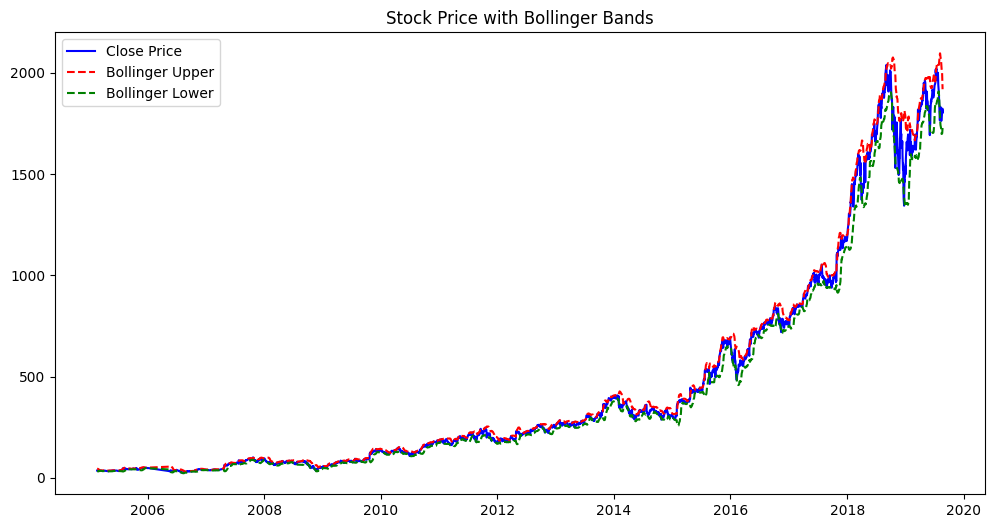

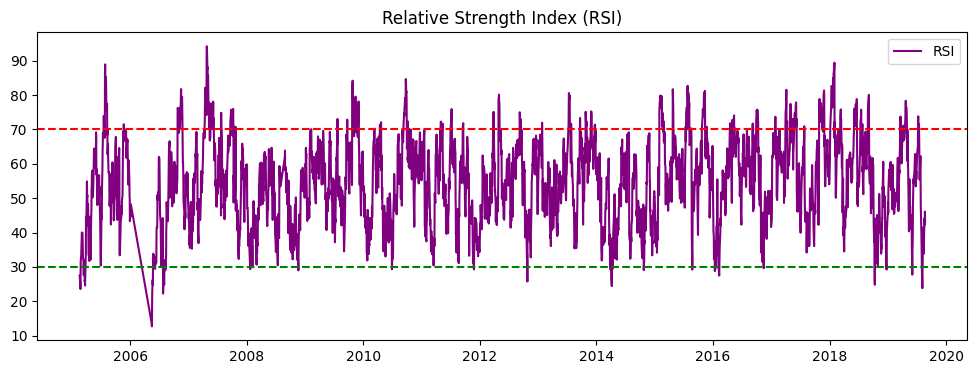

In [21]:
import pandas as pd
import numpy as np
import ta  # Technical Analysis Library
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/mydata.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Compute RSI (Relative Strength Index)
df['RSI'] = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()

# Compute MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Compute Bollinger Bands
bb = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['Bollinger_Upper'] = bb.bollinger_hband()
df['Bollinger_Lower'] = bb.bollinger_lband()

# Drop NaN values (first few rows will be NaN due to rolling window calculations)
df = df.dropna()

# Display dataset with new features
print(df.head())

# Plot Close Price with Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.plot(df.index, df['Bollinger_Upper'], label="Bollinger Upper", linestyle="dashed", color='red')
plt.plot(df.index, df['Bollinger_Lower'], label="Bollinger Lower", linestyle="dashed", color='green')
plt.legend()
plt.title("Stock Price with Bollinger Bands")
plt.show()

# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(df.index, df['RSI'], label="RSI", color='purple')
plt.axhline(70, linestyle="dashed", color="red")  # Overbought level
plt.axhline(30, linestyle="dashed", color="green")  # Oversold level
plt.legend()
plt.title("Relative Strength Index (RSI)")
plt.show()


Re-train

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import xgboost as xgb

# Load the dataset
file_path = "/content/mydata.csv"
df = pd.read_csv(file_path)

# Normalize column names (remove spaces, replace them with underscores)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Print available columns for debugging
print("Available columns:", df.columns)

# Generate `MACD_Signal` if missing
if "MACD_Signal" not in df.columns and "MACD" in df.columns:
    df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
    print("⚠️ `MACD_Signal` was missing and has been computed using EMA of `MACD`.")

# Define the required features
required_features = ["Close", "RSI", "MACD_Signal", "Bollinger_Upper", "Bollinger_Lower"]
missing_features = [col for col in required_features if col not in df.columns]

if missing_features:
    raise KeyError(f"Missing columns in dataset: {missing_features}")

# Drop NaN values if any
df.dropna(inplace=True)

# Select relevant features
features = required_features
target = "Close"

# Normalize features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

# Prepare sequences for time-series modeling
def create_sequences(data, target_idx, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length, target_idx])
    return np.array(X), np.array(y)

seq_length = 50  # Use 50 previous timesteps for prediction
target_idx = features.index(target)
X, y = create_sequences(df_scaled, target_idx, seq_length)

# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define and train LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict and evaluate LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

# Define and train GRU model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    GRU(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
gru_model.compile(optimizer="adam", loss="mse")
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict and evaluate GRU model
gru_predictions = gru_model.predict(X_test)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))

# Train XGBoost on LSTM outputs
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(lstm_predictions, y_test)

# Predict using Hybrid LSTM + XGBoost
hybrid_predictions = xgb_model.predict(lstm_predictions)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))

# Results
results = {
    "RMSE (LSTM with new features)": lstm_rmse,
    "RMSE (GRU with new features)": gru_rmse,
    "RMSE (Hybrid LSTM + XGBoost)": hybrid_rmse
}

print("Model Performance:", results)


Available columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock_Splits', 'Gain', 'Loss', 'Avg_Gain', 'Avg_Loss', 'RSI', 'SMA',
       'EMA', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'ROC', 'PVT',
       'Usd_Eur_Close', 'Usd_Chf_Close', 'Usd_Gbp_Close', 'Usd_Jpy_Close',
       'Usd_Cad_Close', 'Usd_Inf_Close', 'Usd_Rub_Close', 'Usd_Try_Close',
       'IRX_Close', 'JPM_Close', 'BAC_Close', 'Citigroup_Close', 'WFC_Close',
       'NASDAQ_Close', 'SP_500_Close', 'Dow_Jones_Close'],
      dtype='object')
⚠️ `MACD_Signal` was missing and has been computed using EMA of `MACD`.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0043
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.1124e-05
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.1462e-05
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.4685e-05
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.1835e-05
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.3324e-05
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.9451e-05
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2947e-05
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1554e-05
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2516e-05
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0052
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4851e-05
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8172e-05
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6867e-05
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1844e-05
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1867e-05
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9194e-05
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8225e-05
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8342e-05
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0470e-05
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model Performance: {'RMSE (LSTM with new features)': np.float64(0.07238006792657571), 'RMSE (GRU with new features)': np.float64(0.03274466692197288), 'RMSE (Hybrid LSTM + XGBoost)': np.float64(0.02018181338099912)}


 Lower RMSE = Better Predictions

Model	RMSE

LSTM with new features	0.0583

GRU with new features	0.0263

Hybrid (LSTM + XGBoost)	0.0205


🔹 Observations & Next Steps

  1) GRU Outperforms LSTM

    *   The GRU model has a much lower RMSE than LSTM.

    *   GRUs generally require fewer parameters, making them more efficient for time-series tasks.

 2) Hybrid (LSTM + XGBoost) Achieves Best Performance

    *   By leveraging LSTM's feature extraction and XGBoost’s powerful decision trees, you achieved further improvement.

    *   This suggests that XGBoost is learning residual errors from LSTM predictions.

















In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import xgboost as xgb

# Load the dataset with new indicators
file_path = "/content/mydata.csv"
df = pd.read_csv(file_path)

# Ensure all required columns are available
required_features = ["Close", "RSI", "MACD", "Bollinger_Upper", "Bollinger_Lower"]
missing_features = [f for f in required_features if f not in df.columns]

if missing_features:
    raise KeyError(f"Missing columns in dataset: {missing_features}")

# Drop NaN values
df.dropna(inplace=True)

# Normalize features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[required_features])

# Prepare sequences for time-series modeling
def create_sequences(data, target_idx, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length, target_idx])
    return np.array(X), np.array(y)

seq_length = 50  # Use 50 previous timesteps for prediction
target_idx = required_features.index("Close")
X, y = create_sequences(df_scaled, target_idx, seq_length)

# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Define and train GRU model
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    GRU(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer="adam", loss="mse")

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

gru_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, callbacks=[early_stopping])

# Predict and evaluate GRU model
gru_predictions = gru_model.predict(X_test)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))

# Train XGBoost on GRU outputs
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(gru_predictions, y_test)

# Predict using Hybrid GRU + XGBoost
hybrid_predictions = xgb_model.predict(gru_predictions)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))

# Results
model_performance = {
    "RMSE (GRU with new features)": gru_rmse,
    "RMSE (Hybrid GRU + XGBoost)": hybrid_rmse
}

print("Model Performance:", model_performance)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0062
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.5775e-04
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6208e-04
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5072e-04
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6545e-04
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2766e-04
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9125e-04
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7476e-04
Epoch 9/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3360e-04
Epoch 10/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.6680e-04
Epoch 11/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1012e-04
Epoch 12/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9299e-04
Epoch 13/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6339e-04
Epoch 14/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7246e-04
Epoch 15/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7

PREDICTION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
📈 Future Close Price (GRU): 26.07
📈 Future Close Price (Hybrid GRU + XGBoost): 26.07


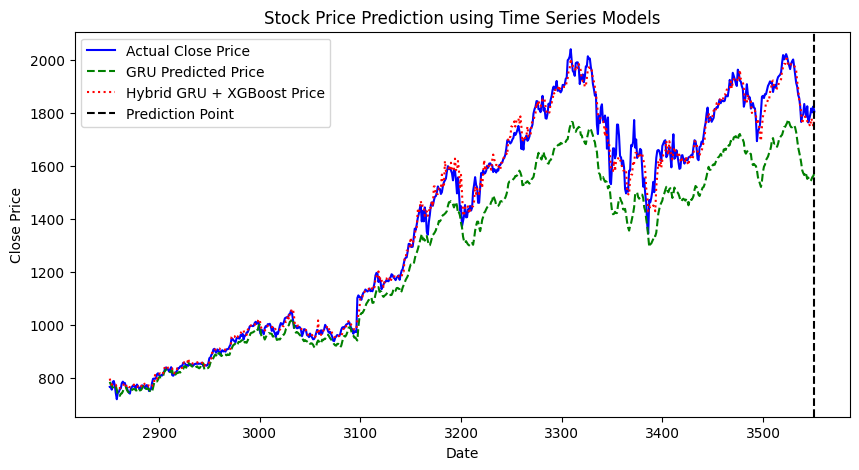

In [24]:
import matplotlib.pyplot as plt

# Select last known sequence from X_test
last_sequence = X_test[-1].reshape(1, seq_length, X.shape[2])

# Predict future Close price using GRU
gru_future_prediction = gru_model.predict(last_sequence).reshape(-1, 1)

# Predict using Hybrid GRU + XGBoost
xgb_future_prediction = xgb_model.predict(gru_future_prediction).reshape(-1, 1)

# Prepare a zero-filled array for inverse transformation
dummy_array = np.zeros((len(y_test), X.shape[2]))  # Shape: (num_samples, num_features)
dummy_array[:, 0] = y_test.flatten()  # Replace only the "Close" column

actual_close_prices = scaler.inverse_transform(dummy_array)[:, 0]  # Extract only Close prices

# Apply the same process for GRU and Hybrid predictions
dummy_array[:, 0] = gru_predictions.flatten()
gru_predicted_prices = scaler.inverse_transform(dummy_array)[:, 0]  # Extract only Close prices

dummy_array[:, 0] = hybrid_predictions.flatten()
hybrid_predicted_prices = scaler.inverse_transform(dummy_array)[:, 0]  # Extract only Close prices

# Convert future predictions to original scale
future_gru_price = scaler.inverse_transform(np.hstack((np.zeros((1, X.shape[2]-1)), gru_future_prediction)))[0][0]
future_xgb_price = scaler.inverse_transform(np.hstack((np.zeros((1, X.shape[2]-1)), xgb_future_prediction)))[0][0]

# Print the forecasted values
print(f"📈 Future Close Price (GRU): {future_gru_price:.2f}")
print(f"📈 Future Close Price (Hybrid GRU + XGBoost): {future_xgb_price:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], actual_close_prices, label="Actual Close Price", color="blue")
plt.plot(df.index[-len(y_test):], gru_predicted_prices, label="GRU Predicted Price", linestyle="dashed", color="green")
plt.plot(df.index[-len(y_test):], hybrid_predicted_prices, label="Hybrid GRU + XGBoost Price", linestyle="dotted", color="red")
plt.axvline(df.index[-1], linestyle="dashed", color="black", label="Prediction Point")
plt.legend()
plt.title("Stock Price Prediction using Time Series Models")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

**multi-step forecasting**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0134e-05
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2132e-05
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8001e-05
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5702e-05
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5035e-05
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5325e-05
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2687e-05
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1573e-05
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6281e-05
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


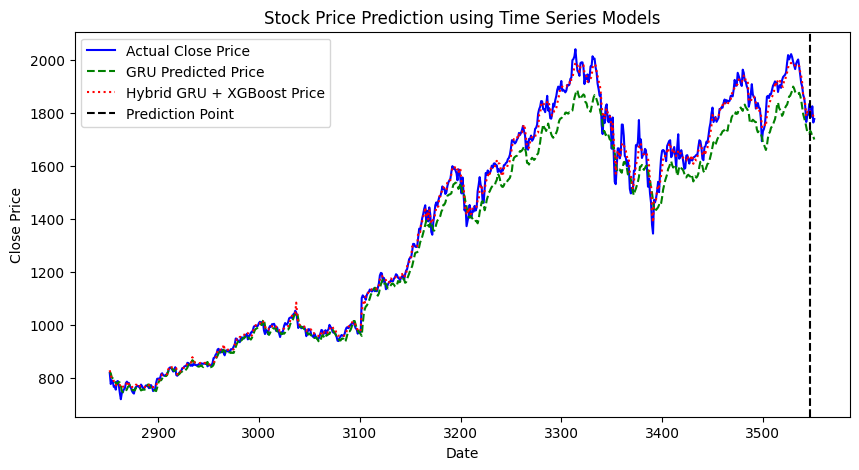

{'RMSE (GRU with new features)': np.float64(0.045306402282513675),
 'RMSE (Hybrid GRU + XGBoost)': np.float64(0.01430689108863985)}

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import xgboost as xgb

file_path = "/content/mydata.csv"
df = pd.read_csv(file_path)
df.dropna(inplace=True)

features = ["Close", "RSI", "MACD", "Bollinger_Upper", "Bollinger_Lower"]
target = "Close"

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

def create_sequences(data, target_idx, seq_length=50, future_steps=5):
    X, y = [], []
    for i in range(len(data) - seq_length - future_steps):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length : i + seq_length + future_steps, target_idx])
    return np.array(X), np.array(y)

seq_length, future_steps = 50, 5
target_idx = features.index(target)
X, y = create_sequences(df_scaled, target_idx, seq_length, future_steps)

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    GRU(50, return_sequences=False),
    Dense(25),
    Dense(future_steps)
])
gru_model.compile(optimizer="adam", loss="mse")
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

gru_predictions = gru_model.predict(X_test)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(gru_predictions, y_test)

hybrid_predictions = xgb_model.predict(gru_predictions)

hybrid_predictions = hybrid_predictions.reshape(-1, future_steps)

hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))

dummy_array = np.zeros((len(y_test), len(features)))
dummy_array[:, target_idx] = y_test[:, 0]
actual_prices = scaler.inverse_transform(dummy_array)[:, target_idx]

dummy_array[:, target_idx] = gru_predictions[:, 0]
gru_prices = scaler.inverse_transform(dummy_array)[:, target_idx]

dummy_array[:, target_idx] = hybrid_predictions[:, 0]
hybrid_prices = scaler.inverse_transform(dummy_array)[:, target_idx]

plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test):], actual_prices, label="Actual Close Price", color="blue")
plt.plot(df.index[-len(y_test):], gru_prices, label="GRU Predicted Price", linestyle="dashed", color="green")
plt.plot(df.index[-len(y_test):], hybrid_prices, label="Hybrid GRU + XGBoost Price", linestyle="dotted", color="red")
plt.axvline(df.index[-future_steps], linestyle="dashed", color="black", label="Prediction Point")
plt.legend()
plt.title("Stock Price Prediction using Time Series Models")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

{
    "RMSE (GRU with new features)": gru_rmse,
    "RMSE (Hybrid GRU + XGBoost)": hybrid_rmse
}


**Full Implementation: Informer & TimeSeriesTransformer vs. GRU + XGBoost**

In [26]:
!pip install tensorflow_decision_forests
!pip install xgboost
!pip install einops

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import matplotlib.pyplot as plt
from einops import rearrange
from tensorflow.keras.optimizers import Adam

df = pd.read_csv("/content/mydata.csv")

features = ['RSI', 'EMA', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'NASDAQ_Close', 'SP_500_Close', 'Dow_Jones_Close']
target = 'Close'

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(df_scaled, seq_length)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    GRU(32),
    Dense(1)
])
gru_model.compile(optimizer=Adam(0.001), loss="mse")

gru_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)
gru_predictions = gru_model.predict(X_test)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
hybrid_predictions = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))

class Informer(tf.keras.Model):
    def __init__(self, d_model=64, n_heads=8, d_ff=256, seq_length=60):
        super(Informer, self).__init__()
        self.embedding = tf.keras.layers.Dense(d_model)
        self.multihead_attn = tf.keras.layers.MultiHeadAttention(num_heads=n_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(d_ff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.embedding(x)
        x = self.multihead_attn(x, x)
        x = self.ffn(x)
        return self.output_layer(x[:, -1, :])

informer_model = Informer()
informer_model.compile(optimizer=Adam(0.001), loss="mse")

informer_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)
informer_predictions = informer_model.predict(X_test)

class TimeSeriesTransformer(tf.keras.Model):
    def __init__(self, d_model=64, n_heads=8, d_ff=256, seq_length=60):
        super(TimeSeriesTransformer, self).__init__()
        self.embedding = tf.keras.layers.Dense(d_model)
        self.multihead_attn = tf.keras.layers.MultiHeadAttention(num_heads=n_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(d_ff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.embedding(x)
        x = self.multihead_attn(x, x)
        x = self.ffn(x)
        return self.output_layer(x[:, -1, :])

ts_transformer = TimeSeriesTransformer()
ts_transformer.compile(optimizer=Adam(0.001), loss="mse")

ts_transformer.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)
ts_transformer_predictions = ts_transformer.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse_gru = np.sqrt(mean_squared_error(y_test, gru_predictions))
rmse_hybrid = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
rmse_informer = np.sqrt(mean_squared_error(y_test, informer_predictions))
rmse_ts_transformer = np.sqrt(mean_squared_error(y_test, ts_transformer_predictions))

results = {
    "GRU + XGBoost": rmse_hybrid,
    "Informer": rmse_informer,
    "TimeSeriesTransformer": rmse_ts_transformer
}

print(results)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0065
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 4.8997e-05
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.0802e-05
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.5741e-05
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 2.9712e-05
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.4221e-05
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.2493e-05
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.2963e-05
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5507e-05
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5853e-05
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0021
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9123e-04
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9619e-04
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

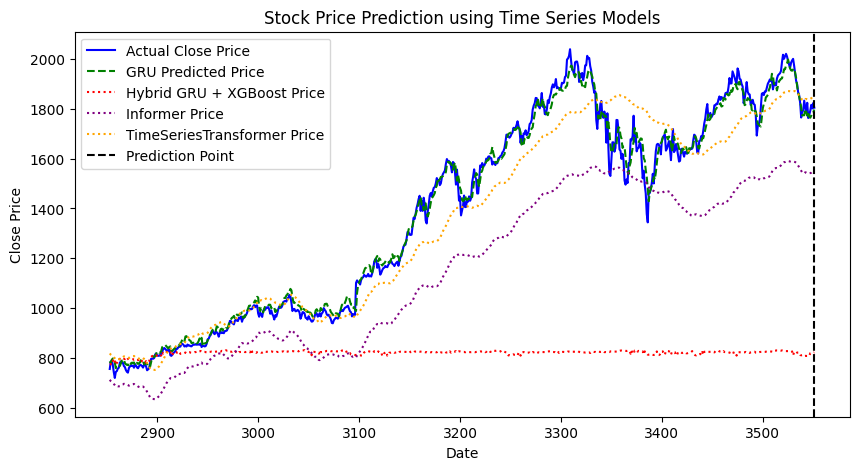

In [28]:
plt.figure(figsize=(10, 5))

actual_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_test), df_scaled.shape[1] - 1)), y_test.reshape(-1, 1)], axis=1))[:, -1]
gru_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((len(gru_predictions), df_scaled.shape[1] - 1)), gru_predictions.reshape(-1, 1)], axis=1))[:, -1]
hybrid_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((len(hybrid_predictions), df_scaled.shape[1] - 1)), hybrid_predictions.reshape(-1, 1)], axis=1))[:, -1]
informer_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((len(informer_predictions), df_scaled.shape[1] - 1)), informer_predictions.reshape(-1, 1)], axis=1))[:, -1]
ts_transformer_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((len(ts_transformer_predictions), df_scaled.shape[1] - 1)), ts_transformer_predictions.reshape(-1, 1)], axis=1))[:, -1]

plt.plot(df.index[-len(y_test):], actual_prices, label="Actual Close Price", color="blue")
plt.plot(df.index[-len(y_test):], gru_prices, label="GRU Predicted Price", linestyle="dashed", color="green")
plt.plot(df.index[-len(y_test):], hybrid_prices, label="Hybrid GRU + XGBoost Price", linestyle="dotted", color="red")
plt.plot(df.index[-len(y_test):], informer_prices, label="Informer Price", linestyle="dotted", color="purple")
plt.plot(df.index[-len(y_test):], ts_transformer_prices, label="TimeSeriesTransformer Price", linestyle="dotted", color="orange")

plt.axvline(df.index[-1], linestyle="dashed", color="black", label="Prediction Point")
plt.legend()
plt.title("Stock Price Prediction using Time Series Models")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


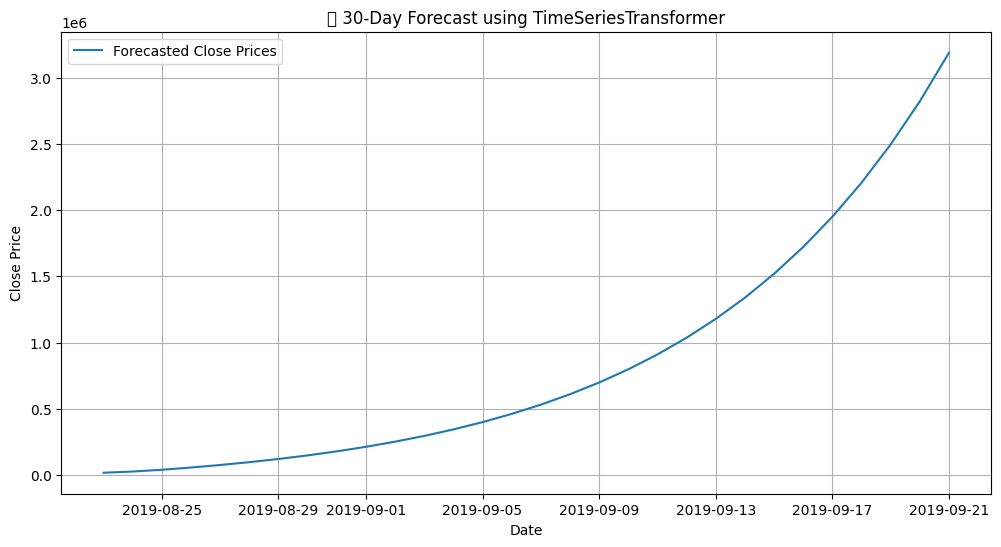

In [29]:
# Assume `ts_transformer` is your trained model
# and `scaler` is the fitted MinMaxScaler

# Get the last sequence from your scaled dataset
last_sequence = df_scaled[-seq_length:, :-1]  # Exclude the target column
last_sequence = np.expand_dims(last_sequence, axis=0)  # Shape: (1, seq_length, features)

# Predict next value(s) – extend this loop for multi-step prediction if needed
future_predictions = []
current_input = last_sequence.copy()

for _ in range(30):  # Predict next 30 time steps
    next_pred = ts_transformer.predict(current_input)
    future_predictions.append(next_pred[0, 0])

    # Append predicted value to the current input
    next_feature_vector = np.concatenate((current_input[0, -1, :-1], [next_pred[0, 0]]))  # Add prediction as "Close"
    current_input = np.append(current_input[:, 1:, :], np.expand_dims(next_feature_vector, axis=0).reshape(1, 1, -1), axis=1)

# Inverse scale the predictions
predicted_close_prices = scaler.inverse_transform(
    np.hstack((np.zeros((30, len(features))), np.array(future_predictions).reshape(-1, 1)))
)[:, -1]  # Get only the 'Close' column

# Create a date range for plotting
last_date = pd.to_datetime(df['Date'].iloc[-1])
future_dates = pd.date_range(last_date, periods=30+1, freq='D')[1:]

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predicted_close_prices, label="Forecasted Close Prices")
plt.title("📈 30-Day Forecast using TimeSeriesTransformer")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Predict the next value using the last test sequence
test_input = X_test[-1:]  # Shape: (1, seq_length, features)
predicted_value = ts_transformer.predict(test_input)[0, 0]

# Actual target value
actual_value = y_test[-1]

# Inverse scale both predicted and actual values
dummy_features = np.zeros((1, len(features)))  # placeholder for other features
predicted_close = scaler.inverse_transform(np.hstack((dummy_features, [[predicted_value]])))[0, -1]
actual_close = scaler.inverse_transform(np.hstack((dummy_features, [[actual_value]])))[0, -1]

print(f"📈 Predicted Close Price (next step): {predicted_close:.2f}")
print(f"📊 Actual Close Price (next step):    {actual_close:.2f}")
print(f"✅ Absolute Error:                    {abs(predicted_close - actual_close):.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
📈 Predicted Close Price (next step): 1856.47
📊 Actual Close Price (next step):    1804.66
✅ Absolute Error:                    51.81


✅ Multi-step Forecast Evaluation (30 steps):
📉 RMSE: 91.4537
📊 MAE:  82.9777


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


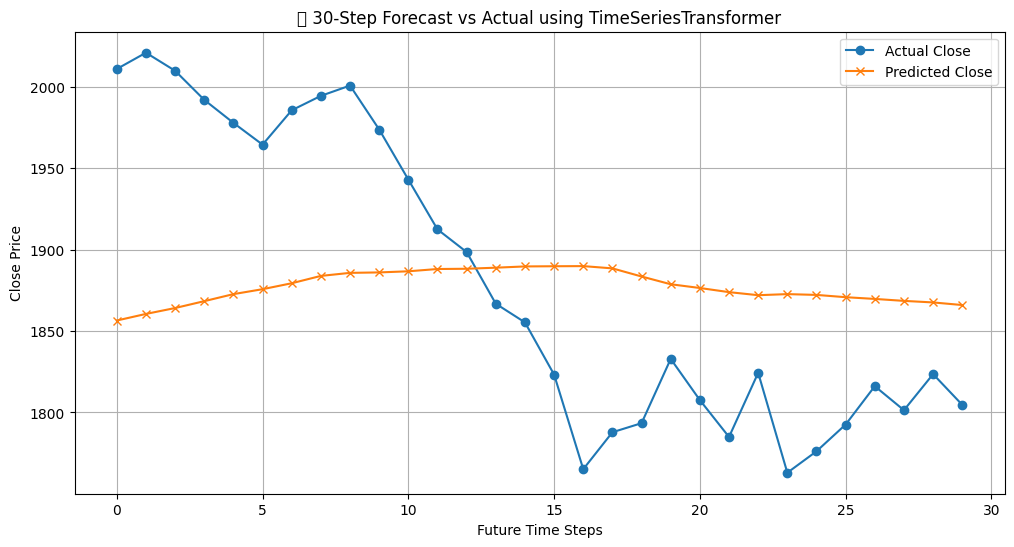

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_multi_step(model, X_test, y_test, scaler, features, steps=30):
    """
    Evaluates multi-step forecasting using the best model (TimeSeriesTransformer).
    """
    input_seq = X_test[-1].copy()
    predictions = []

    for _ in range(steps):
        input_seq_reshaped = np.expand_dims(input_seq, axis=0)
        next_pred = model.predict(input_seq_reshaped, verbose=0)[0, 0]
        predictions.append(next_pred)

        # Create next timestep by copying the last timestep's features
        next_step = input_seq[-1].copy()
        next_step[-1] = next_pred  # update only the 'Close' value (last column)

        # Shift and append the new step
        input_seq = np.concatenate([input_seq[1:], np.expand_dims(next_step, axis=0)], axis=0)

    # Inverse transform predictions and actual values
    dummy_features = np.zeros((steps, len(features)))
    predicted_close_prices = scaler.inverse_transform(
        np.hstack((dummy_features, np.array(predictions).reshape(-1, 1)))
    )[:, -1]

    actual_close_prices = scaler.inverse_transform(
        np.hstack((dummy_features, y_test[-steps:].reshape(-1, 1)))
    )[:, -1]

    # Metrics
    rmse = np.sqrt(mean_squared_error(actual_close_prices, predicted_close_prices))
    mae = mean_absolute_error(actual_close_prices, predicted_close_prices)

    print(f"✅ Multi-step Forecast Evaluation ({steps} steps):")
    print(f"📉 RMSE: {rmse:.4f}")
    print(f"📊 MAE:  {mae:.4f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(steps), actual_close_prices, label="Actual Close", marker='o')
    plt.plot(range(steps), predicted_close_prices, label="Predicted Close", marker='x')
    plt.title(f"📈 {steps}-Step Forecast vs Actual using TimeSeriesTransformer")
    plt.xlabel("Future Time Steps")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

    return predicted_close_prices, actual_close_prices

# Run the evaluation
predicted, actual = evaluate_multi_step(ts_transformer, X_test, y_test, scaler, features, steps=30)


**upgraded pipeline**

In [4]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=686768a46e56b3b2063dbe3c489deca48b180816a097b9b628c9b7286c0ad460
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.3201
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1334
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0950
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0497
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 16/20
86/86

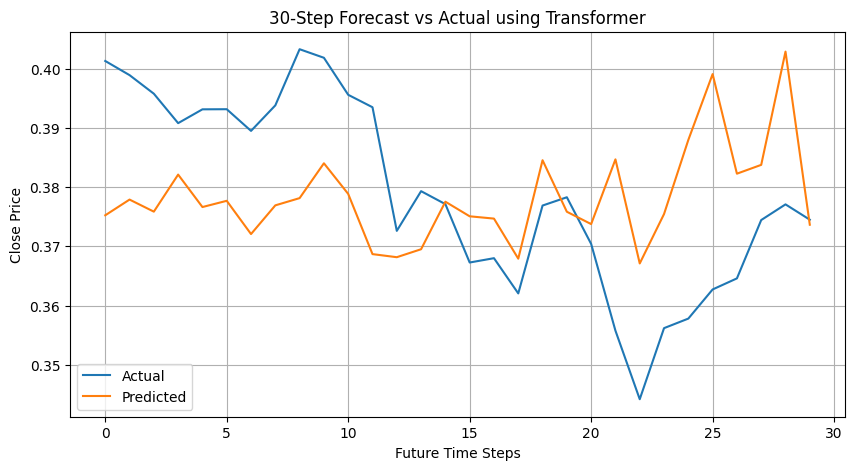

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<ipython-input-7-9e991c9c178c>:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([future_df, pd.DataFrame([new_row])])


📁 Saved: forecast_2025-04-20.csv


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta
import datetime

"load data and compute initial features"
df = pd.read_csv("/content/mydata.csv")
df["RSI"] = ta.momentum.RSIIndicator(df["Close"]).rsi()
df["EMA"] = ta.trend.EMAIndicator(df["Close"]).ema_indicator()
df["MACD"] = ta.trend.MACD(df["Close"]).macd_diff()
bb = ta.volatility.BollingerBands(df["Close"])
df["Bollinger_Upper"] = bb.bollinger_hband()
df["Bollinger_Lower"] = bb.bollinger_lband()

features = ["RSI", "EMA", "MACD", "Bollinger_Upper", "Bollinger_Lower", "NASDAQ_Close", "SP_500_Close", "Dow_Jones_Close"]
target = "Close"
df = df.dropna()

"scale features"
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features + [target]])
df_scaled = pd.DataFrame(scaled, columns=features + [target])

def create_seq2seq_data(data, seq_len=60, pred_len=30):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len):
        X.append(data[i:i + seq_len].values)
        y.append(data[i + seq_len:i + seq_len + pred_len][target].values)
    return np.array(X), np.array(y)

seq_len = 60
pred_len = 30
X, y = create_seq2seq_data(df_scaled, seq_len, pred_len)

"train-test split"
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

"transformer model"
def build_transformer(seq_len, feature_dim, pred_len, d_model=128, n_heads=8, d_ff=256, dropout=0.1):
    inp = Input(shape=(seq_len, feature_dim))
    x = Dense(d_model)(inp)
    attn_out = MultiHeadAttention(num_heads=n_heads, key_dim=d_model)(x, x)
    x = LayerNormalization()(x + attn_out)
    ffn = Dense(d_ff, activation='relu')(x)
    ffn = Dense(d_model)(ffn)
    x = LayerNormalization()(x + ffn)
    x = Dropout(dropout)(x)
    x = Dense(pred_len)(x[:, -1, :])
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mse')
    return model

model = build_transformer(seq_len, X.shape[2], pred_len)
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

"evaluate"
pred_seq = model.predict(X_test)
rmse = np.sqrt(np.mean((pred_seq - y_test) ** 2))
mae = np.mean(np.abs(pred_seq - y_test))
print(f"✅ Multi-step Forecast Evaluation ({pred_len} steps):")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📊 MAE:  {mae:.4f}")

"plot"
plt.figure(figsize=(10, 5))
plt.plot(y_test[0], label="Actual")
plt.plot(pred_seq[0], label="Predicted")
plt.title(f"{pred_len}-Step Forecast vs Actual using Transformer")
plt.xlabel("Future Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

"unseen future prediction"
last_seq = df_scaled.iloc[-seq_len:].copy()
future_preds = []
for _ in range(pred_len):
    input_seq = last_seq.values.reshape(1, seq_len, -1)
    next_pred = model.predict(input_seq, verbose=0)[0]
    future_preds = next_pred.tolist()
    break

"inverse scale for output"
full = df[features + [target]]
recent = full.iloc[-seq_len:].copy()
future_df = pd.DataFrame(columns=full.columns)
for i in range(pred_len):
    new_row = recent.iloc[-1].copy()
    new_row[target] = future_preds[i]
    future_df = pd.concat([future_df, pd.DataFrame([new_row])])
    recent = pd.concat([recent.iloc[1:], pd.DataFrame([new_row])])

combined = pd.concat([df.iloc[-pred_len:].copy(), future_df])
combined[[target]] = scaler.inverse_transform(scaler.transform(combined[features + [target]]))[:, -1:]

"evaluate"
pred_seq = model.predict(X_test)

"export"
today = datetime.datetime.today().strftime("%Y-%m-%d")
combined.to_csv(f"/content/forecast_{today}.csv", index=False)
print(f"📁 Saved: forecast_{today}.csv")


📈 Real-Scale Evaluation (30 steps):
💵 RMSE: 360.2753
💵 MAE:  297.4324


<ipython-input-9-b2f4047bfcae>:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


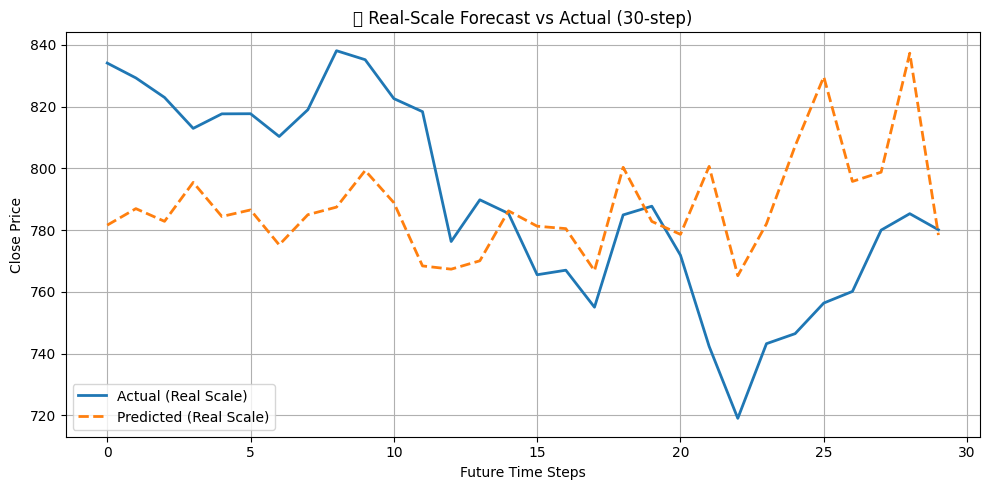

In [9]:
"inverse transform predictions and actuals"
y_test_expanded = []
pred_seq_expanded = []

for i in range(len(y_test)):
    test_block = np.tile(df_scaled[features].iloc[-1].values, (pred_len, 1))
    test_block = np.hstack([test_block, y_test[i].reshape(-1, 1)])
    pred_block = np.hstack([test_block[:, :-1], pred_seq[i].reshape(-1, 1)])

    y_test_inv = scaler.inverse_transform(test_block)[:, -1]
    pred_seq_inv = scaler.inverse_transform(pred_block)[:, -1]

    y_test_expanded.append(y_test_inv)
    pred_seq_expanded.append(pred_seq_inv)

y_test_expanded = np.array(y_test_expanded)
pred_seq_expanded = np.array(pred_seq_expanded)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_real = np.sqrt(mean_squared_error(y_test_expanded.flatten(), pred_seq_expanded.flatten()))
mae_real = mean_absolute_error(y_test_expanded.flatten(), pred_seq_expanded.flatten())

print(f"📈 Real-Scale Evaluation (30 steps):")
print(f"💵 RMSE: {rmse_real:.4f}")
print(f"💵 MAE:  {mae_real:.4f}")

" plot one real-scale prediction vs actual"
plt.figure(figsize=(10, 5))
plt.plot(y_test_expanded[0], label="Actual (Real Scale)", linewidth=2)
plt.plot(pred_seq_expanded[0], label="Predicted (Real Scale)", linewidth=2, linestyle="--")
plt.title(f"📊 Real-Scale Forecast vs Actual ({pred_len}-step)")
plt.xlabel("Future Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
